In [1]:
import pandas as pd
import numpy as np

In [2]:
def plot_box(data, x_ticklabels, x_label = 'method', title = 'test',scale = True, ylim = None, color_list = None, save_path = None):
    import matplotlib.pyplot as plt
    import numpy as np

    meanpointprops = dict(markeredgecolor='black', markerfacecolor='firebrick')
    ax = plt.subplot()
    bplot = ax.boxplot(data, patch_artist=True, showmeans=True, meanprops= meanpointprops) # 绘图
    if ylim != None:
        plt.axhline(ylim, color='r')                             # 画出 y=1 这条水平线
    if scale:
        ax.set_ylim([0,1])                                       # 设置y轴值的范围  rotation=30
    # ax.set_xticks()                                            # 自定义x轴的值
    ax.set_xlabel(x_label)                                       # 设置x轴的标签
    ax.set_xticklabels(x_ticklabels,  rotation=90,fontsize=10)   # 设置x轴坐标值的标签 旋转角度 字体大小
    ax.set_title(title)                                          # 设置图像标题
    # ax.legend(labels= ['A','B','C','D'],loc='best',)           # 增加图例
    # ax.text(x=0.2 , y=3.5 , s="test" ,fontsize=12)             # 增加注
    if color_list != None:
        assert len(color_list) == len(x_ticklabels), 'color num is error'
        for patch, color in zip(bplot['boxes'], color_list):
            patch.set_facecolor(color)
    if save_path != None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()
    plt.close()


In [3]:
import matplotlib
import seaborn as sns
def get_colors(num):
    if num <= 10:
        return sns.color_palette(palette='tab10', n_colors=num).as_hex()
    elif num <= 20:
        return sns.color_palette(palette='tab20', n_colors=num).as_hex()
    else:
        return list(matplotlib.colors.cnames.values())[:num]
    

def plot_scatter(df, x, y, title = None, colors = None, scale = [False, False], pos = [1.3, 0.5], save_path = None):
    import matplotlib.pyplot as plt
    import numpy as np

    df = df.reset_index(drop=True)
    c = colors
    ax = plt.subplot()
    ax.set_aspect('equal', adjustable='box')
#     ax.vlines(df[x], df[y]-0.05, df[y]+0.05, colors=c)
#     ax.hlines(df[y], df[x]-0.05, df[x]+0.05, colors=c)
    ax.scatter(df[x], df[y], marker = 'P', c = c,linewidths=0.01, s =200)     # 绘图
    ax.set_xlabel(x)                                             # 设置x轴的标签
    ax.set_ylabel(y)                                             # 设置x轴的标签
    if title != None:
        ax.set_title(title)                                      # 设置图像标题
    # ax.legend(labels= df['method'],loc='best',colors=c)           # 增加图例
    # ax.text(x=0.2 , y=3.5 , s="test" ,fontsize=12)             # 增加注
    ##########    增加图例
    import matplotlib.patches as mpatches
    patch_list = []
    for index,row in df.iterrows():
        patch_list.append( mpatches.Patch(color=c[index], label=row['method'] ) )
    ax.legend(handles=patch_list,bbox_to_anchor=(pos[0], pos[1]), loc=7, borderaxespad=0.)
    if scale[0]:
        ax.set_xlim([0,1])
    if scale[1]:
        ax.set_ylim([0,1])
    if scale[0] and scale[1]:
        Axis_line=np.linspace(*ax.get_xlim(),2)
        ax.plot(Axis_line,Axis_line,transform=ax.transAxes,linestyle='--',linewidth=2,color='black',label="1:1 Line")
    if save_path != None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()
    plt.close()

    
# plot_scatter(df_temp, 'k3', 'k4', title = 'cASW', scale=[True, True], pos = [1.3, 0.5], save_path = None)

In [4]:
def plot_line(df, x, y, title = 'test', ylim = None, save_path = None):
    import matplotlib.pyplot as plt
    x1 = df[x].tolist()
    y1 = df[y].tolist()
    # 设置画布大小
    plt.figure(figsize=(16, 4))
    # 标题
    plt.title(title)
    # 数据
    plt.plot(x1, y1, label='method', linewidth=3, color='r', marker='o',
             markerfacecolor='blue', markersize=20)
    # 横坐标描述
    plt.xlabel(x)
    # 纵坐标描述
    plt.ylabel(y)
    # 画出 y=ylim 这条水平线
    if ylim != None:
        plt.axhline(ylim, color='r')                             
    # 设置数字标签
    for a, b in zip(x1, y1):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=16)
    plt.legend()
    if save_path != None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()
    
# plot_line(df_temp, 'method', 'iLISI', 'iLISI')

In [5]:
def process_index_result_multi(df_list, experiments, my_index, only_annotation, best_result):
    #### create dataframe
    df_temp = pd.DataFrame()
#     df_temp['Method'] = df_list[0]['Method']
    df_temp['method'] = df_list[0]['method']
    df_temp['cluster_method'] = df_list[0]['cluster_method']

    #### add experiment result 2 dataframe
    for i in range(len(df_list)):
        if my_index in ['spatial_coherence_score', 'SCS_orgin', 'SCS_align']:
            df_temp[experiments[i]] = df_list[i][my_index].abs().values
        else:
            df_temp[experiments[i]] = df_list[i][my_index].values
    
    if my_index in ['ARI', 'NMI']:
        df_temp = df_temp[df_temp['cluster_method'] != 'ground.truth']

    #### cal avg
    df_temp['avg'] = df_temp.mean(axis=1, numeric_only=True)

    #### sort by avg
    df_temp = df_temp.sort_values(by='avg',ascending=False)

    #### only show annotation
    if only_annotation:
        df_temp = df_temp[df_temp['cluster_method']=='ground.truth']

    #### only show best result for every method
    if best_result:
        df_temp = df_temp.drop_duplicates(subset=['method'], keep='first')
        
    return df_temp

def process_index_result(df, my_index, only_annotation, best_result):
    #### create dataframe
    df_temp = pd.DataFrame()
#     df_temp['Method'] = df_list[0]['Method']
    df_temp['method'] = df['method']
    df_temp['cluster_method'] = df['cluster_method']

    #### add experiment result 2 dataframe  
    if my_index in ['spatial_coherence_score', 'SCS_orgin', 'SCS_align']:
        df_temp[my_index] = round(df[my_index],3).abs().values
    else:
        df_temp[my_index] = round(df[my_index],3).values

    #### sort by avg
    df_temp = df_temp.sort_values(by=my_index,ascending=False)

    #### only show annotation
    if only_annotation:
        df_temp = df_temp[df_temp['cluster_method']=='ground.truth']

    #### only show best result for every method
    if best_result:
        df_temp = df_temp.drop_duplicates(subset=['method'], keep='first')
        
    return df_temp

In [6]:
def select_df_columns(df, columns, only_annotation = False, add_avg=True, best_result=False):
    df_temp = pd.DataFrame()
    df_temp['method'] = df['method']
    df_temp['cluster_method'] = df['cluster_method']
    
    #### add experiment result 2 dataframe  

    for column in columns:
        if column in ['spatial_coherence_score', 'SCS_orgin', 'SCS_align']:
            df_temp[column] = round(df[column],3).abs().values
        elif column in ["Geary's C", "gearysC", "gearyC", "GearysC"]:
            df_temp[column] = round( 1 - df[column], 3).values
        else:
            df_temp[column] = round(df[column],3).values
#         df_temp[column] = round(df[column],3)
    
    if only_annotation:
        df_temp = df_temp[df_temp['cluster_method']=='ground.truth']

    if add_avg:
        #### cal avg
        df_temp['avg'] = df_temp.mean(axis=1, numeric_only=True)
        #### sort by avg
        df_temp = df_temp.sort_values(by='avg',ascending=False)

    # df_temp = df_temp.sort_values(by=columns[0],ascending=False)
    #### only show best result for every method
    if best_result:
        df_temp = df_temp.sort_values(by=columns[0],ascending=False)
        df_temp = df_temp.drop_duplicates(subset=['method'], keep='first')
    return df_temp

In [7]:
input_path = 'G:/dataset/result_index/'
# df1 = pd.read_csv(input_path + 'DLPFC_donor1_embedding_index.csv')
# df2 = pd.read_csv(input_path + 'DLPFC_donor2_embedding_index.csv')
# df3 = pd.read_csv(input_path + 'DLPFC_donor3_embedding_index.csv')
# df1 = df1[df1['method'] != 'GraphST3000']
# df2 = df2[df2['method'] != 'GraphST3000']
# df3 = df3[df3['method'] != 'GraphST3000']

# df1 = pd.read_csv(input_path + 'MouseAtlas_embryo1_embedding_index.csv')
# df2 = pd.read_csv(input_path + 'MouseAtlas_embryo2_embedding_index.csv')
# df3 = pd.read_csv(input_path + 'MouseAtlas_embryo3_embedding_index.csv')
# df1['Sample'] = 'embryo1'
# df2['Sample'] = 'embryo2'
# df3['Sample'] = 'embryo3'

# df_list = [df1, df2, df3]
# df2

# df_list
# df1 = pd.read_csv(input_path + 'Saggital_sample1_embedding_index.csv', index_col = 0)
# df2 = pd.read_csv(input_path + 'Saggital_sample2_embedding_index.csv', index_col = 0)

# df1 = pd.read_csv(input_path + 'LICA_embedding_index_k3.csv', index_col = 0)
# df2 = pd.read_csv(input_path + 'LICA_embedding_index_k4.csv', index_col = 0)

# df_list = [df1, df2]
# df1

# df = pd.read_csv(input_path + 'BRCA_index_embedding.csv', index_col = 0)
# df

# df = pd.read_csv(input_path + 'mPFC_index_embedding.csv', index_col = 0)

# df = pd.read_csv(input_path + 'MOp_embedding_index.csv', index_col = 0)

# df = pd.read_csv(input_path + 'Coronal_index_embedding.csv', index_col = 0)

# df = pd.read_csv(input_path + 'mouseOB35_index_embedding.csv', index_col = 0)

df = pd.read_csv(input_path + 'MOSTA_index_embedding.csv', index_col = 0)
df
# samples = df['Sample'].unique().tolist()
# df_list = []
# for sample in samples:
#     df_list.append(df[df['Sample'] == sample])
# df_list

,Sample,method,cluster_method,spatial_coherence_score,ARI,NMI,cASW,cLISI,IsolatedLabelsAsw,IsolatedLabelsF1,iASW,iLISI,graph_connectivity,kBET,PCR,Moran's I,Geary's C
0,embryo1,seurat,ground.truth,-804.980322,1.000000,1.000000,0.500644,0.977580,0.505436,0.398110,0.870109,0.324367,0.958874,0.147769,0.993239,0.692488,0.242230
1,embryo1,seurat,leiden,-1097.960197,0.391199,0.590378,0.560077,0.996679,0.662845,NaN,0.916564,NaN,1.000000,0.275762,NaN,NaN,NaN
2,embryo1,seurat,louvain,-979.602598,0.351758,0.573835,0.561044,0.996962,0.736415,NaN,0.919128,NaN,1.000000,0.293376,NaN,NaN,NaN
3,embryo1,seurat,mclust,-1297.894810,0.288009,0.530057,0.531010,0.985241,0.804685,NaN,0.924605,NaN,0.985892,0.263156,NaN,NaN,NaN
0,embryo1,harmony,ground.truth,-881.130260,1.000000,1.000000,0.504168,0.969209,0.493900,0.387468,0.891272,0.349823,0.944855,0.199392,0.997223,0.672028,0.247409
1,embryo1,harmony,leiden,-1107.062983,0.351396,0.561785,0.546876,0.992669,0.557866,NaN,0.947304,NaN,1.000000,0.338676,NaN,NaN,NaN
2,embryo1,harmony,louvain,-1140.006766,0.337757,0.551176,0.545271,0.993166,0.557986,NaN,0.944008,NaN,1.000000,0.341031,NaN,NaN,NaN
3,embryo1,harmony,mclust,-1220.451484,0.248469,0.480488,0.515135,0.968394,0.519233,NaN,0.949359,NaN,0.973424,0.351839,NaN,NaN,NaN
0,embryo1,liger,ground.truth,-770.597749,1.000000,1.000000,0.496660,0.953464,0.464194,0.288773,0.836188,0.386540,0.814341,0.325908,0.996681,0.930177,0.051439
1,embryo1,liger,leiden,-906.361555,0.272974,0.484175,0.597581,0.996527,0.742990,NaN,0.953721,NaN,1.000000,0.701711,NaN,NaN,NaN


In [ ]:
# df = pd.concat([df1,df2])
# print(df)
# df.groupby(["method", "cluster_method"]).aggregate("mean")
df = df1

In [8]:
methods = df['method'].unique()
c = get_colors(len(df['method'].unique()))
method_color_dict = {}
for i in range(len(c)):
    method_color_dict[methods[i]] = c[i]
    
method_color_dict

{'seurat': '#1f77b4',
 'harmony': '#ff7f0e',
 'liger': '#2ca02c',
 'PRECAST': '#d62728',
 'STAGATE': '#9467bd',
 'STAligner': '#8c564b',
 'DeepST': '#e377c2',
 'GraphST': '#7f7f7f',
 'SPIRAL_pyg': '#bcbd22'}

## 两个指标  散点图

In [21]:
df_temp = df[df['cluster_method']== 'ground.truth']
df_temp['spatial_coherence_score'].abs().mean()

821.8622624333334

C:\Users\23147\AppData\Local\Temp\ipykernel_4560\1848210582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['spatial_coherence_score'] = df_temp['spatial_coherence_score'].abs().round(3)      # graph_connectivity


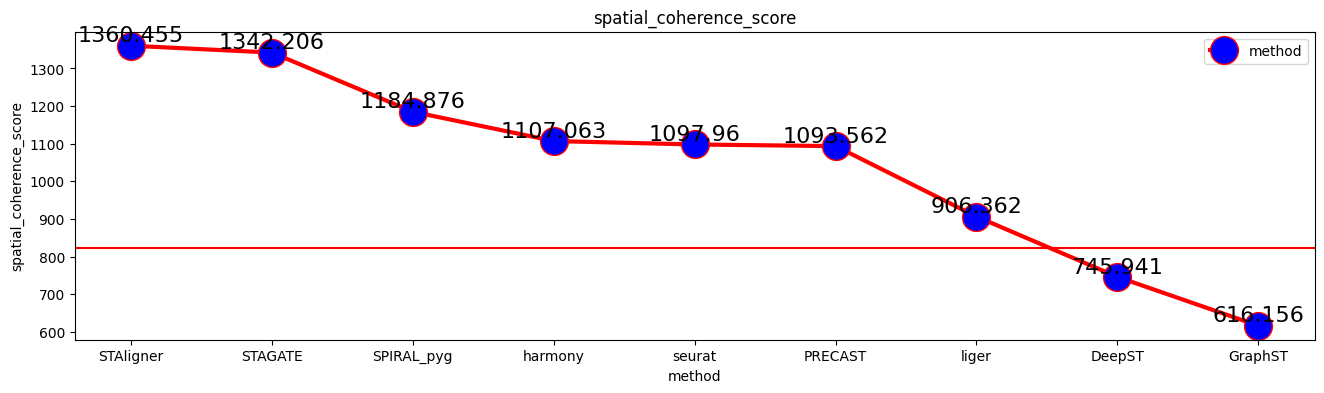

In [22]:
df_temp = df[df['cluster_method']!= 'ground.truth']           # graph_connectivity  

df_temp.index = df_temp.method
df_temp['spatial_coherence_score'] = df_temp['spatial_coherence_score'].abs().round(3)      # graph_connectivity
df_temp = df_temp.drop_duplicates(subset=['method'], keep='first')
df_temp = df_temp.sort_values(by='spatial_coherence_score',ascending=False)
plot_line(df_temp, 'method', 'spatial_coherence_score', 'spatial_coherence_score',
          ylim = 821.8622624333334, 
          save_path = 'G:/dataset/result_pic/index_res/spatial_coherence_score.png')

In [24]:
columns = ["Moran's I", "Geary's C"]
# save = False
save = True

df_temp = df[df['cluster_method']== 'ground.truth']
df_temp = select_df_columns(df_temp, columns, only_annotation = False,  add_avg=False, best_result=True)
# df_temp["Geary's C"] = 1 - df_temp["Geary's C"]
print(df_temp)
df_temp = df_temp.groupby(['method']).agg('mean')
df_temp['method'] = df_temp.index.tolist()

# df_temp = df_temp2

c_list = [method_color_dict[i] for i in df_temp['method'].tolist()]
print(df_temp)
save_path = None
if save:  
    save_path = 'G:/dataset/result_pic/index_res/'+columns[0]+'_'+columns[1]+'.png'
    df_temp.to_csv('G:/dataset/result_pic/index_res/'+columns[0]+'_'+columns[1]+'.csv')
plot_scatter(df_temp, columns[0], columns[1],colors = c_list, title = 'cluster score', 
             scale=[False, False], pos = [1.4, 0.5], 
             save_path = save_path)

       method cluster_method  Moran's I  Geary's C
0      DeepST   ground.truth      0.973      0.985
0     PRECAST   ground.truth      0.968      0.993
0     STAGATE   ground.truth      0.951      0.957
0   STAligner   ground.truth      0.950      0.956
0       liger   ground.truth      0.930      0.949
0     GraphST   ground.truth      0.860      0.880
0  SPIRAL_pyg   ground.truth      0.828      0.870
0      seurat   ground.truth      0.692      0.758
0     harmony   ground.truth      0.672      0.753
            Moran's I  Geary's C      method
method                                      
DeepST          0.973      0.985      DeepST
GraphST         0.860      0.880     GraphST
PRECAST         0.968      0.993     PRECAST
SPIRAL_pyg      0.828      0.870  SPIRAL_pyg
STAGATE         0.951      0.957     STAGATE
STAligner       0.950      0.956   STAligner
harmony         0.672      0.753     harmony
liger           0.930      0.949       liger
seurat          0.692      0.758      se

C:\Users\23147\AppData\Local\Temp\ipykernel_4560\3259395754.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_temp.groupby(['method']).agg('mean')


In [ ]:
df_temp['avg'] = (df_temp['cASW'] + df_temp['IsolatedLabelsAsw'])/2
df_temp.sort_values(by='IsolatedLabelsAsw',ascending=False)

## 多个dataframe box  一个指标 line          

In [ ]:
df1
# df = (df1 + df2 + df3)/3
# df
# df[df['cluster_method'] == 'ground.truth'].mean()

In [ ]:
experiments = ['k=3', 'k=4']
my_index = "spatial_coherence_score"
only_annotation = True
best_result = True
save_res = True
output_dir = 'G:/dataset/result_pic/index_res/'

# donor1    0.128901
# donor2    0.181037
# donor3    0.242260
# avg       0.184066
ylim = None

save_list = [output_dir + my_index + i for i in ['_index.csv', '_experiment.png', '_method.png']]
if save_res:
    if only_annotation:
        save_list = [i[:-4] + '_annotation' + i[-4:] for i in save_list]
    elif best_result:
        save_list = [i[:-4] + '_best' + i[-4:] for i in save_list]
    else:
        save_list = [i[:-4] + '_all' + i[-4:] for i in save_list]
        
else:
    save_list[1] = None
    save_list[2] = None

# df_temp_list =  [df_[df_['cluster_method']!='ground.truth'] for df_ in df_list]
# df_temp = process_index_result(df, my_index, only_annotation, best_result)
# df_temp = df_temp.dropna(axis=0, how='any')
# print(df_temp)
####### multiple dataframe
df_temp = process_index_result_multi(df_list, experiments, my_index, only_annotation, best_result)
df_temp = df_temp.dropna(axis=0, how='any')
print(df_temp)
if save_res:
    df_temp.to_csv(save_list[0])
    

# plot by experiments
plot_box(df_temp[experiments].values, x_ticklabels = experiments, x_label = 'experiment', title = my_index, 
         scale = False, ylim = ylim,save_path = save_list[1])
print(df_temp.mean(axis=0, numeric_only=True))

# plot by methods
c_list = [method_color_dict[i] for i in df_temp['method'].tolist()]
plot_box(df_temp[experiments].values.T, x_ticklabels = df_temp['method'].tolist(), x_label = 'method', title = my_index ,
         scale = False, ylim = ylim, color_list = c_list, save_path = save_list[2])


# plot_line(df_temp, 'method', my_index, my_index, save_path = save_list[2])

# plot_scatter(df_temp, 'k3', 'k4', title = my_index+'_best', scale=[True, True], pos = [1.3, 0.5], save_path = save_list[2])

In [ ]:
round(df_temp['iLISI'],3)

# spatial index

In [ ]:
input_path = 'G:/dataset/result_index/'
df = pd.read_csv(input_path + 'MouseAtlas_spatial_index.csv')
df
# df_temp = df[['Sample', 'Method', "SCS_orgin", "SCS_align"]]
# df_temp = df[['Sample', 'Method', "Moran's I_align_100", "Geary's C_align_100"]]
# df_temp = df[['Sample', 'Method', "SSIM", "SSIM_0_1", "SSIM_1_2", "SSIM_2_3"]]
# df_temp = df[['Sample', 'Method', "PCC", "PCC_0_1", "PCC_1_2", "PCC_2_3"]]

df_temp = df[['Sample', 'Method', "SSIM", "PCC"]]
df_temp

In [ ]:
# df_temp["Geary's C_align_100"] = 1 - df_temp["Geary's C_align_100"]
df_list = [df_temp[df_temp['Sample']==sample] for sample in ['embryo1', 'embryo2', 'embryo3']]
df_list

In [ ]:
# print(df_temp['SCS_orgin'].abs().mean())
# df_temp['SCS_align'] = df_temp['SCS_align'].abs()


# print(df_temp["Moran's I_align_100"].mean())
# print(df_temp["Geary's C_align_100"].mean())

# print(df_temp.groupby(['Method']).agg('mean'))
# df_temp = df_temp.groupby(['Method']).agg('mean')
# df_temp

In [ ]:
def process_index_result_multi_spatial(df_list, experiments, my_index, best_result):
    #### create dataframe
    df_temp = pd.DataFrame()
    df_temp['Method'] = df_list[0]['Method']

    #### add experiment result 2 dataframe
    for i in range(len(df_list)):
        if my_index in ['spatial_coherence_score', 'SCS_orgin', 'SCS_align']:
            df_temp[experiments[i]] = df_list[i][my_index].abs().values
        else:
            df_temp[experiments[i]] = df_list[i][my_index].values
    
    if my_index in ['ARI', 'NMI']:
        df_temp = df_temp[df_temp['cluster_method'] != 'ground.truth']

    #### cal avg
    df_temp['avg'] = df_temp.mean(axis=1, numeric_only=True)

    #### sort by avg
    df_temp = df_temp.sort_values(by='avg',ascending=False)

    #### only show best result for every method
    if best_result:
        df_temp = df_temp.drop_duplicates(subset=['Method'], keep='first')
        
    return df_temp

In [ ]:
methods = df['Method'].unique()
c = get_colors(len(df['Method'].unique()))
method_color_spatial_dict = {}
for i in range(len(c)):
    method_color_spatial_dict[methods[i]] = c[i]
    
method_color_spatial_dict

In [ ]:
# plot_box(data, x_ticklabels, x_label = 'method', title = 'test',scale = True, ylim = None, color_list = None, save_path = None):
output_dir = 'G:/dataset/result_pic/index_res/'
experiments = ['embryo1', 'embryo2', 'embryo3']

my_index = "Geary's C_align_100"
best_result = True
save = True
ylim = 0.34553187844444444
save_path = output_dir + my_index + '.png' if save else None

df_temp = process_index_result_multi_spatial(df_list, experiments, my_index, best_result)
df_temp = df_temp.dropna(axis=0, how='any')
print(df_temp)
c_list = [method_color_spatial_dict[i] for i in df_temp['Method'].tolist()]

plot_box(df_temp[experiments].values.T, x_ticklabels = df_temp['Method'].tolist(), x_label = 'method', title = my_index ,
         scale = False, ylim = ylim, color_list = c_list, save_path = save_path)

In [ ]:
df_temp = df_temp.groupby('Method').agg('mean')
df_temp['method'] = df_temp.index
columns = ['SSIM', 'PCC']

c_list = [method_color_spatial_dict[i] for i in df_temp['method'].tolist()]

plot_scatter(df_temp, columns[0], columns[1],colors = c_list, title = 'spatial score', 
             scale=[True, True], pos = [1.4, 0.5], 
             save_path = output_dir+columns[0]+'-'+columns[1]+'.png')

In [ ]:
df1_spatial = pd.read_csv(r'G:\dataset\1_DLPFC\output\donor1\donor2_STalign.csv', header = None)
df1_spatial.columns = ['method', 'index', 'SVG_num', 'score', 'slice']

indexs = df1_spatial['index'].unique().tolist()
slices = df1_spatial['slice'].unique().tolist()
print(indexs)
print(slices)
print(df1_spatial)
for index,row in df1_spatial.iterrows():
    if row['index'].find('gearyC') != -1:
        df1_spatial.at[index, 'score'] = 1 - row['score']

methods = ['STalign']
for method in methods:
    df_temp_res = pd.DataFrame()
    df_list = []
    for s in slices:
        df_temp = df1_spatial
        df_temp = df_temp[(df_temp['method'] ==method) & (df_temp['slice']==s )]
        df_list.append(df_temp)

    # print(df_list)

    df_temp_res['method'] = df_list[0]['method']
    df_temp_res['index'] = df_list[0]['index']
    df_temp_res['SVG_num'] = df_list[0]['SVG_num']

    for df_temp2 in df_list:
        df_temp_res[ str(df_temp2['slice'].tolist()[0]) ] = df_temp2['score'].values
    #     print(df_temp2)

    df_temp_res['avg'] = df_temp_res.mean(axis=1, numeric_only=True)
#     print(df_temp_res)
    df_temp_res.T.to_csv('G:/dataset/1_DLPFC/output/donor1/' + method + '_res_MoranI_GearyC.csv')


# ARI

In [ ]:
df_ARI = pd.read_csv(r'G:\dataset\result_index\DLPFC_ARI.csv')
df_ARI

In [ ]:
my_index = 'ARI'
output_dir = 'G:/dataset/result_pic/index_res/'

method_color_dict['GraphST'] = method_color_dict['GraphST20']

columns = [str(i) for i in range(151507, 151511)] + [str(i) for i in range(151669, 151677)]
df_temp = select_df_columns(df_ARI, columns, only_annotation = False, add_avg=True, best_result=True)
print(df_temp)
# df_temp.to_csv(output_dir + my_index + '_slice.csv')
c_list = [method_color_dict[i] for i in df_temp['method'].tolist()]
plot_box(df_temp[columns].values.T, x_ticklabels = df_temp['method'].tolist(), x_label = 'method', title = my_index+'_slice', 
         color_list = c_list, save_path = output_dir + my_index + '_slice.png')

columns = ['donor1', 'donor2', 'donor3']
df_temp = select_df_columns(df_ARI, columns, only_annotation = False, add_avg=True, best_result=True)
print(df_temp)
# df_temp.to_csv(output_dir + my_index + '_sample.csv')
c_list = [method_color_dict[i] for i in df_temp['method'].tolist()]
plot_box(df_temp[columns].values.T, x_ticklabels = df_temp['method'].tolist(), x_label = 'method', title = my_index+'_sample' ,
         save_path = output_dir + my_index + '_sample.png')



In [ ]:
df = pd.read_csv(r'G:\dataset\1_DLPFC\output\donor1\spatial_index.csv')
df

In [ ]:
df = pd.DataFrame()
df.index = ['seurat', 'harmony', 'liger', 'PRECAST', 'STAGATE', 'STAligner', 'DeepST', 'GraphST', 'SPIRAL']
df

In [ ]:
df_k3_ARI = pd.read_csv(input_path + 'LICA_index_ARI_k3.csv', index_col = 0)
df_k3_ARI

In [ ]:
# df_k0_ARI['sample_mean'] = df_k0_ARI[['sample1', 'sample2']].mean(axis=1, numeric_only=True)
df_k3_ARI['slice_mean'] = df_k3_ARI[['HCC-5A', 'HCC-5B', 'HCC-5C', 'HCC-5D']].mean(axis=1, numeric_only=True)
df_k3_ARI


In [ ]:
df_temp = df_k3_ARI.sort_values(by='slice_mean',ascending=False)
df_temp = df_temp.drop_duplicates(subset=['method'], keep='first')
df_temp.index = df_temp.method
df_temp

In [ ]:
df['k0_sample'] = df_temp['sample_mean']
df['k0_slice'] = df_temp['slice_mean']
df

In [ ]:
for k in [0, 10]:
    df_k0_ARI = pd.read_csv(input_path + 'BRCA_index_ARI_K'+str(k)+'.csv', index_col = 0)
    df_k0_ARI['sample_mean'] = df_k0_ARI[['integrated']].mean(axis=1, numeric_only=True)
#     df_k0_ARI['sample_mean'] = df_k0_ARI[['sample1', 'sample2']].mean(axis=1, numeric_only=True)
#     df_k0_ARI['slice_mean'] = df_k0_ARI[['anterior1', 'anterior2', 'posterior1', 'posterior2']].mean(axis=1, numeric_only=True)
    df_temp = df_k0_ARI.sort_values(by='sample_mean',ascending=False)
    df_temp = df_temp.drop_duplicates(subset=['method'], keep='first')
    df_temp.index = df_temp.method
    df['k'+str(k)+'_sample'] = df_temp['sample_mean']
#     df['k'+str(k)+'_slice'] = df_temp['slice_mean']

df

In [ ]:
methods = df.index.unique()
c = get_colors(len(df.index.unique()))
method_color_dict = {}
for i in range(len(c)):
    method_color_dict[methods[i]] = c[i]
    
method_color_dict

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


output_dir = 'G:/dataset/result_pic/index_res/'
samples = ['k0', 'k10']

plt.rcParams['font.sans-serif'] = 'Times New Roman'

x = np.arange(0,len(df.index.tolist())*1.5,1.5)
width=0.5
# x1 = x - 2.5 * width
# x2 = x - 1.5 * width
x3 = x - 0.5 * width
x4 = x + 0.5 * width
# x5 = x + 1.5 * width
# x6 = x + 2.5 * width
# x_list = [x1, x2, x3, x4, x5, x6]
x_list = [x3, x4]
y_list = [df[sample + '_sample'] for sample in samples]
c = get_colors(len(samples))
# 绘制分组柱状图

for i in range(len(x_list)):
    plt.bar(x_list[i],y_list[i],width=0.5,label=samples[i],color=c[i],edgecolor='k',zorder=2)

# 添加x,y轴名称、图例和网格线
plt.xlabel('method',fontsize=11)
plt.ylabel('ARI',fontsize=11)
plt.legend(frameon=False)
# plt.grid(ls='--',alpha=0.8)

# 修改x刻度标签为对应日期
plt.xticks(x,df.index,fontsize=8)
plt.tick_params(axis='x',length=0)

plt.tight_layout()
plt.savefig(output_dir + 'ARI_bar.png',dpi=600)
plt.show()
df.to_csv(output_dir + 'ARI_bar.csv')

In [ ]:
sc.read_h5ad(r'G:\dataset\05-LICA\output\result\embedding\seurat_K3_result.h5ad')